In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import libreries

In [58]:
import janitor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler# escalamiento a los datos para que los valores se ajusten a ello
from sklearn.linear_model import LinearRegression # modelo de regresión lineal

### Improve Appearance 

In [59]:
%matplotlib inline 
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize']=(11,9.4)

### Download data

In [60]:
data = pd.read_csv('../../data/raw/housing-california.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Analyzing data

We detected missing values for column `total_rooms`

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Filling missing values using media

In [62]:
data = (
    data
    .transform_column(
        'total_bedrooms',
        lambda x: x.fillna(x.mean()),
        elementwise=False
    )
)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


how close are the houses to the sea?

In [64]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Ploting histogram, Most of the graphics are not normal and concentrated to the left.

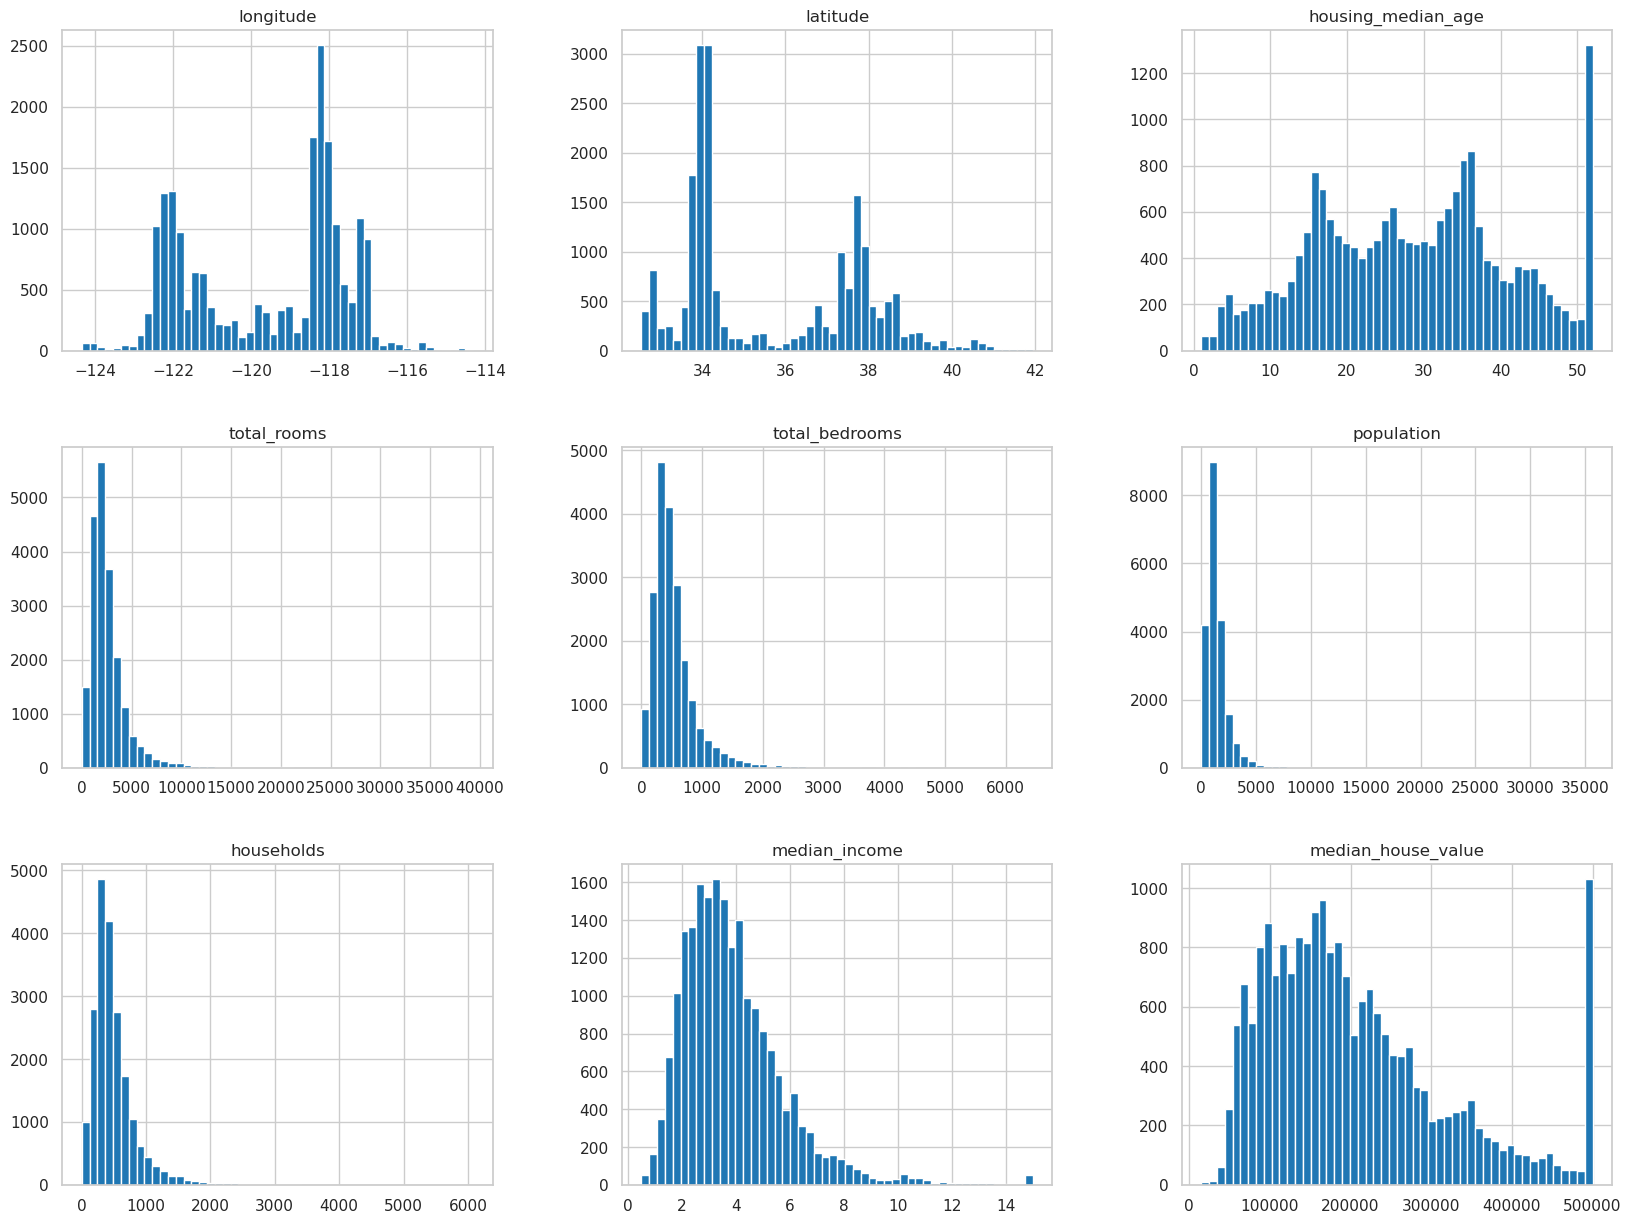

In [65]:
data.hist(bins=50, figsize=(20,15));

### Plotting with the coordinates

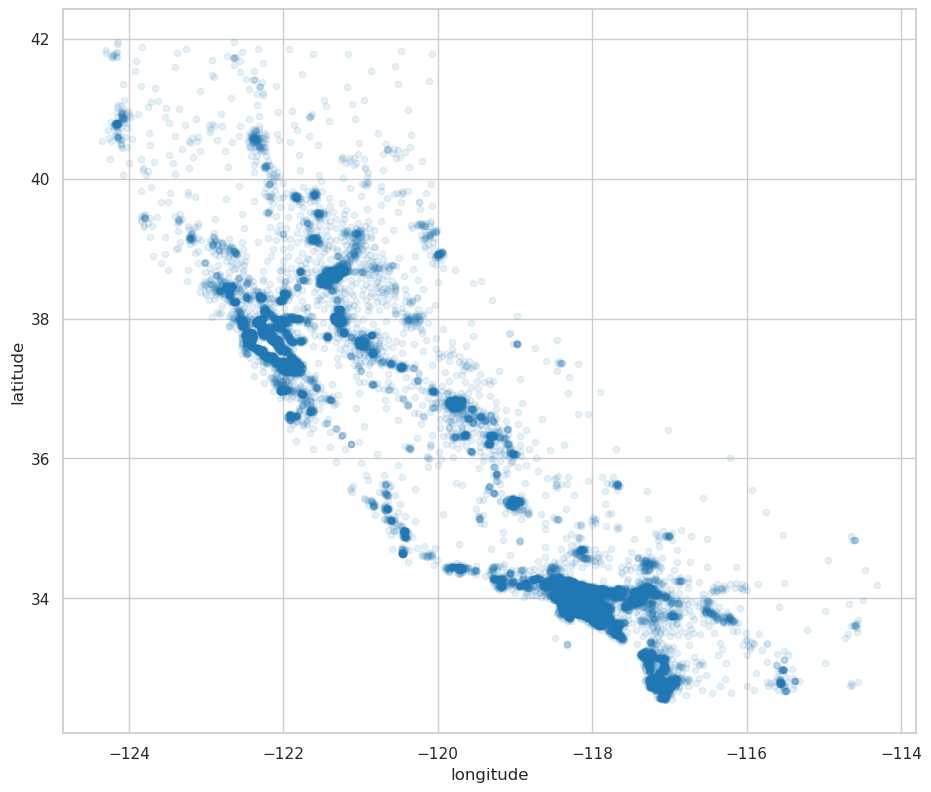

In [66]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1);

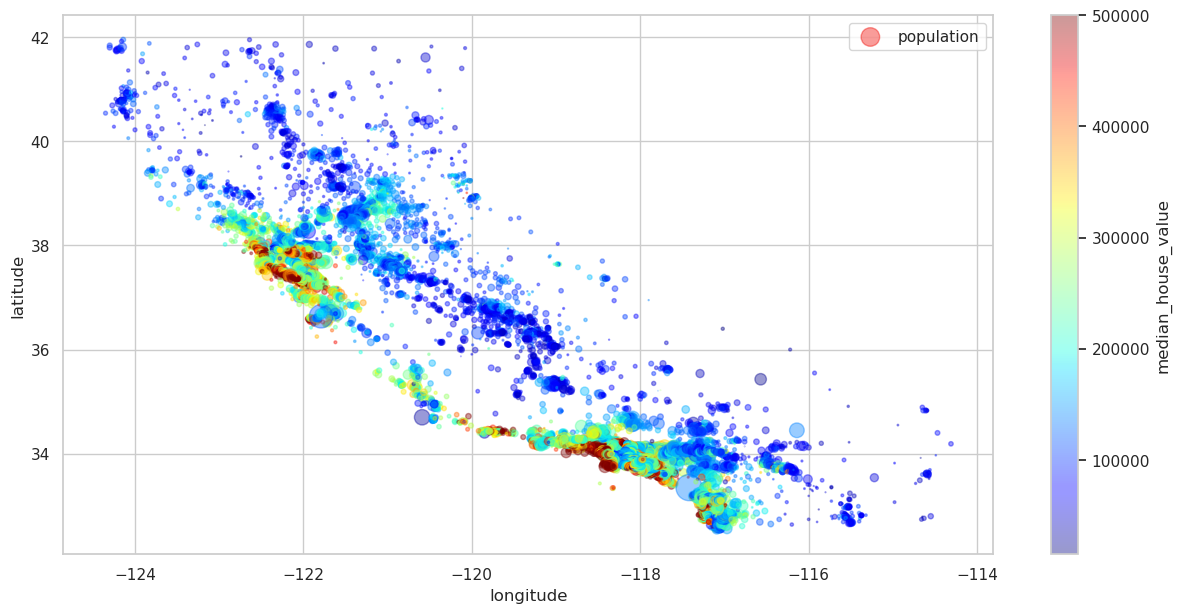

In [67]:
data.plot(
    kind='scatter', 
    x='longitude', 
    y='latitude', 
    alpha=0.4,
    s=data['population']/100, # define the size of the points 
    label='population', 
    figsize=(15,7),
    c='median_house_value', # like hue 
    cmap=plt.get_cmap('jet'), # define color
    colorbar=True
);
plt.legend()

### correlacion 


<Axes: >

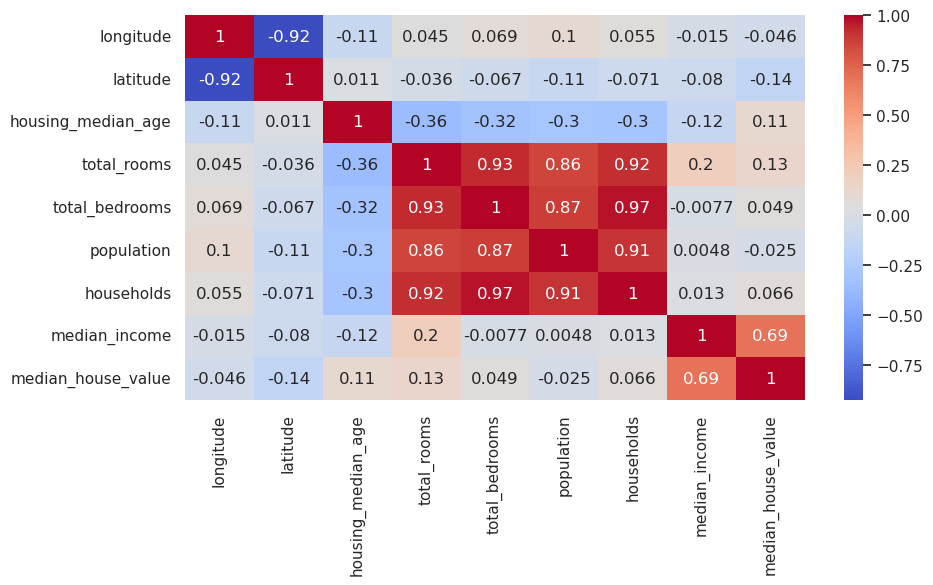

In [68]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [69]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### Combinación de atributuros
* `rooms_per_household`: Representa el número medio de habitaciones por hogar en una cierta área. Proporciona una medida de la densidad de habitaciones en una vivienda promedio en esa área.
* `bedrooms_per_room`: Indica la proporción de dormitorios con respecto al número total de habitaciones en una cierta área. 
* `population_per_household`: Representa la densidad de población promedio por hogar en una cierta área.


In [70]:
data['rooms_per_household'] = data['total_rooms']/data['households']
data['bedrooms_per_room'] = data['total_bedrooms']/data['total_rooms']
data['population_per_household'] = data['population']/data['households']

In [71]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049454
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.220049
Name: median_house_value, dtype: float64

### Limpieza de datos y manejo de atributos categóricos

In [72]:
#data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


### Manage categorical encoder using onehotencoder.

In [74]:
categorical_columns = data.select_dtypes(include='object').columns
categorical_columns

Index(['ocean_proximity'], dtype='object')

In [75]:
from sklearn.preprocessing import OrdinalEncoder
import sklearn.compose


In [76]:
transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OneHotEncoder(), categorical_columns),
    remainder='passthrough'
)

In [77]:
encoded_df = (
    pd.DataFrame(
        transformer.fit_transform(data),
        columns = transformer.get_feature_names_out(),
        index=data.index
    )
    .rename(
        columns = lambda x: x.removeprefix('onehotencoder__')
    )
    .rename(
        columns = lambda x: x.removeprefix('remainder__')
    )
   
)
encoded_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,0.0,0.0,0.0,1.0,0.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,0.0,0.0,0.0,1.0,0.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,0.0,0.0,0.0,1.0,0.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,0.0,0.0,0.0,1.0,0.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606
20636,0.0,1.0,0.0,0.0,0.0,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807
20637,0.0,1.0,0.0,0.0,0.0,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635
20638,0.0,1.0,0.0,0.0,0.0,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209


In [78]:
# from sklearn.preprocessing import OrdinalEncoder
# data_ocean = data[['ocean_proximity']]
# ordinal_encoder = OrdinalEncoder()
# data_ocean_encoded = ordinal_encoder.fit_transform(data_ocean)

In [79]:
# np.random.choice(data_ocean_encoded.ravel(), size=10)

In [80]:
# from sklearn.preprocessing import OneHotEncoder
# cat_encoder = OneHotEncoder()   
# data_car_1hot = cat_encoder.fit_transform(data_ocean)

In [81]:
# data_car_1hot.toarray()

In [82]:
# encoded_df = pd.DataFrame(data_car_1hot.toarray(),columns = cat_encoder.get_feature_names_out())
# encoded_df.head()

### Crear los algoritmos de machine learning
Variables dependientes e independientes.


In [83]:
input_columns = ['median_income', 'rooms_per_household', 'total_rooms',
                    'housing_median_age', 'households', 'ocean_proximity_<1H OCEAN',
                    'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
                    'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

input_columns = encoded_df[input_columns]

inputs = input_columns.values


In [84]:
target = encoded_df['median_house_value'].values.reshape(-1,1)
target

array([[452600.],
       [358500.],
       [352100.],
       ...,
       [ 92300.],
       [ 84700.],
       [ 89400.]])

### REGRESIÓN LINEAL MULTIPLE

In [98]:
from sklearn.model_selection import train_test_split

input_train, input_test, target_train, target_test = train_test_split(
    inputs, 
    target, 
    test_size=0.2,
    random_state=42,

)

In [99]:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(input_train, target_train)

LinearRegression()

In [100]:
target_pred = lin_reg.predict(input_test)

In [101]:

from sklearn.metrics import r2_score

r2 = r2_score(target_test, target_pred)
r2
    

0.5934326451877902

### Escalar variables

In [89]:
from sklearn.preprocessing import StandardScaler

sc_inputs = StandardScaler()
inputs = sc_inputs.fit_transform(inputs)

In [103]:
inputs_train, inputs_test, target_train, target_test = train_test_split(
    inputs,
    target,
    test_size = 0.2,
    random_state = 42
)

In [104]:
lin_reg = LinearRegression()
lin_reg.fit(inputs_train, target_train)

target_pred = lin_reg.predict(inputs_test)

In [105]:
r2 = r2_score(target_test, target_pred)
r2

0.5934326451877902

In [102]:
input_columns = ['median_income', 'rooms_per_household', 'total_rooms',
                    'housing_median_age', 'households', 'ocean_proximity_<1H OCEAN',
                    'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
                    'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

col_modelo =[]

target = encoded_df['median_house_value'].values.reshape(-1,1)

for col in input_columns:
    col_modelo.append(col)
    inputs = encoded_df[col_modelo].values
   
    inputs_train, inputs_test, target_train, target_test = train_test_split(
        inputs,
        target,
        test_size = 0.2,
        random_state=42
    )
    lin_reg = LinearRegression()
    lin_reg.fit(inputs_train, target_train)
    target_pred = lin_reg.predict(inputs_test)
    r2 = r2_score(target_test, target_pred)
    print(f'Columna: {col_modelo} R2: {r2}')

Columna: ['median_income'] R2: 0.45885918903846656
Columna: ['median_income', 'rooms_per_household'] R2: 0.4641710652437856
Columna: ['median_income', 'rooms_per_household', 'total_rooms'] R2: 0.4642001061171047
Columna: ['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age'] R2: 0.5025967868582277
Columna: ['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households'] R2: 0.5234912330082018
Columna: ['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'ocean_proximity_<1H OCEAN'] R2: 0.530397429249533
Columna: ['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND'] R2: 0.5923019310033185
Columna: ['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND'] R2: 0.5932133407941969
Columna: ['median_

### Árbol de regresión

In [94]:
from sklearn.tree import DecisionTreeRegressor

In [106]:
input_columns = ['median_income', 'rooms_per_household', 'total_rooms',
                    'housing_median_age', 'households', 'latitude', 'longitude']

col_modelo =[]

target = encoded_df['median_house_value'].values.reshape(-1,1)

for col in input_columns:
    col_modelo.append(col)
    inputs = encoded_df[col_modelo].values
   
    inputs_train, inputs_test, target_train, target_test = train_test_split(
        inputs,
        target,
        test_size = 0.2,
        random_state=42
    )
    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(inputs_train, target_train)
    target_pred = tree_reg.predict(inputs_test)
    r2 = r2_score(target_test, target_pred)
    print(f'Columna: {col_modelo} R2: {r2}')

Columna: ['median_income'] R2: 0.10422254982698875
Columna: ['median_income', 'rooms_per_household'] R2: 0.07655495382883482
Columna: ['median_income', 'rooms_per_household', 'total_rooms'] R2: 0.0851896412889912
Columna: ['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age'] R2: 0.18649503509100473
Columna: ['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households'] R2: 0.17984292044146355
Columna: ['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'latitude'] R2: 0.2644074104727786
Columna: ['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'latitude', 'longitude'] R2: 0.614827537306856


In [107]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
input_columns = ['median_income', 'rooms_per_household', 'total_rooms',
                    'housing_median_age', 'households', 'latitude', 'longitude']

col_modelo =[]

target = encoded_df['median_house_value'].values

for col in input_columns:
    col_modelo.append(col)
    inputs = encoded_df[col_modelo].values
   
    inputs_train, inputs_test, target_train, target_test = train_test_split(
        inputs,
        target,
        test_size = 0.2,
        random_state=42
    )
    forest_reg  = RandomForestRegressor()
    forest_reg.fit(inputs_train, target_train)
    target_pred = forest_reg.predict(inputs_test)
    r2 = r2_score(target_test, target_pred)
    print(f'Columna: {col_modelo} R2: {r2}')

Columna: ['median_income'] R2: 0.27911904792914644
Columna: ['median_income', 'rooms_per_household'] R2: 0.45833742046657566
Columna: ['median_income', 'rooms_per_household', 'total_rooms'] R2: 0.5013302309742922
Columna: ['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age'] R2: 0.5825098650752027
Columna: ['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households'] R2: 0.5825249897017615
Columna: ['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'latitude'] R2: 0.6474993243882027
Columna: ['median_income', 'rooms_per_household', 'total_rooms', 'housing_median_age', 'households', 'latitude', 'longitude'] R2: 0.8029550113945416
